# Hemläxa 03

---


### Karim Kanji IA20

# FrozenLake
Read more at:

https://medium.com/swlh/frozen-lake-as-a-markov-decision-process-1692815ecfd1


https://zoo.cs.yale.edu/classes/cs470/materials/hws/hw7/FrozenLake.html

Documentation:
https://gymnasium.farama.org/environments/toy_text/frozen_lake/

In [9]:
pip install gymnasium


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pygame

     --------------------------------------- 10.8/10.8 MB 11.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
# frozen-lake-ex3.py

import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map



# Actions in human language
actions = {
    'Left': 0,
    'Down': 1,
    'Right': 2,
    'Up': 3
}

In [6]:
# Variabler
slippery=False
my_policy = ['Right'] + ['Right'] + ['Down'] + ['Down'] + ['Down'] + ['Right'] + ['Right'] + ['Down'] + ['Down'] + ['Right'] + ['Down'] + ['Down'] + ['Right'] + ['Right'] + ['Right']



In [7]:
def my_frozenlake(slippery, my_policy):
    # map8x8 = [
    #     "SFFFFFFF",
    #     "FFFFFFFF",
    #     "FFFHFFFF",
    #     "FFFFFHFF",
    #     "FFFHFFFF",
    #     "FHHFFFHF",
    #     "FHFFHFHF",
    #     "FFFHFFFG",
    #     ]

    print("--- Super amazing policy that will win! ---")
    print(my_policy)
    print("Maze is slippery: ", slippery)

    # env = gym.make("FrozenLake-v1", is_slippery=slippery, render_mode="human")
    # Med random map generation, var det väldigt svårt att lösa uppgiften och gick i praktiken inte en ända gång av mina försök.
    # env = gym.make('FrozenLake-v1', is_slippery = slippery, render_mode="ansi", desc=generate_random_map(size=8))
    env = gym.make("FrozenLake-v1", is_slippery=slippery, render_mode="human", map_name="8x8")
    env.reset()
    env.render()
    print(env.render())
    for a in my_policy:
        new_state, reward, done, truncated, info = env.step(actions[a])
        print()
        env.render()
        print("Reward: {:.2f}".format(reward))
        print("Action:",a)
        print(info)
        print("Position:",new_state)
        if done:
            if reward == 1:
                print("****You reached the goal!****")
            else:
                print("****You fell through a hole!****")
            break
    env.close()

In [8]:
# Kör functionen!
my_frozenlake(slippery, my_policy)

--- Super amazing policy that will win! ---
['Right', 'Right', 'Down', 'Down', 'Down', 'Right', 'Right', 'Down', 'Down', 'Right', 'Down', 'Down', 'Right', 'Right', 'Right']
Maze is slippery:  False
None

Reward: 0.00
Action: Right
{'prob': 1.0}
Position: 1

Reward: 0.00
Action: Right
{'prob': 1.0}
Position: 2

Reward: 0.00
Action: Down
{'prob': 1.0}
Position: 10

Reward: 0.00
Action: Down
{'prob': 1.0}
Position: 18

Reward: 0.00
Action: Down
{'prob': 1.0}
Position: 26

Reward: 0.00
Action: Right
{'prob': 1.0}
Position: 27

Reward: 0.00
Action: Right
{'prob': 1.0}
Position: 28

Reward: 0.00
Action: Down
{'prob': 1.0}
Position: 36

Reward: 0.00
Action: Down
{'prob': 1.0}
Position: 44

Reward: 0.00
Action: Right
{'prob': 1.0}
Position: 45

Reward: 0.00
Action: Down
{'prob': 1.0}
Position: 53

Reward: 0.00
Action: Down
{'prob': 1.0}
Position: 61

Reward: 0.00
Action: Right
{'prob': 1.0}
Position: 62

Reward: 1.00
Action: Right
{'prob': 1.0}
Position: 63
****You reached the goal!****


### Uppgift 1: Gör FrozenLake 8x8 storlek och lös den med en manuell policy (som i Hands-on). <br>

---



Jag började med att göra en randomized maze, men det gick såklart inte att lösa med en manuell policy. Därefter implementerade jag standard kartan 8x8 enlight ([Frozen Lake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/)) <br><br>
som ser ut som följande =

    "8x8": [
        "SFFFFFFF",
        "FFFFFFFF",
        "FFFHFFFF",
        "FFFFFHFF",
        "FFFHFFFF",
        "FHHFFFHF",
        "FHFFHFHF",
        "FFFHFFFG",
    ]

För att lösa den använde ja följande moves:

---



**['Right'] + ['Right'] + ['Down'] + ['Down'] + ['Down'] + ['Right'] + ['Right'] + ['Down'] + ['Down'] + ['Right'] + ['Down'] + ['Down'] + ['Right'] + ['Right'] + ['Right']**

---



Detta ledde till att jag slapp till målet!


### Uppgift 2: Träna en agent att lösa 8x8 FrozenLake med slippery=True och ta fram en policy

---

Kod från: [Exempel kod](https://github.com/johnnycode8/gym_solutions/blob/main/frozen_lake_q.py)


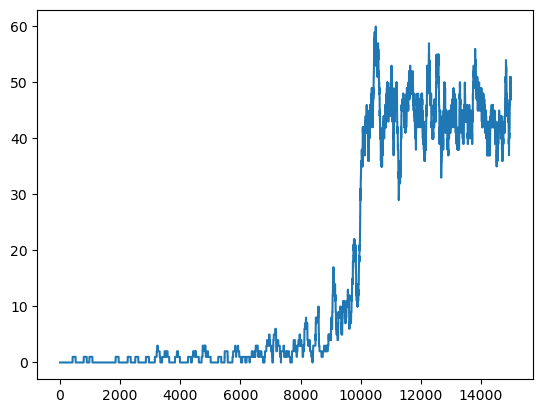

In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

def run(episodes, is_training=True, render=False):

    env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=True, render_mode='human' if render else None)

    if(is_training):
        q = np.zeros((env.observation_space.n, env.action_space.n)) # init a 64 x 4 array
    else:
        f = open('frozen_lake8x8.pkl', 'rb')
        q = pickle.load(f)
        f.close()

    learning_rate_a = 0.9 # alpha or learning rate
    discount_factor_g = 0.9 # gamma or discount rate. Near 0: more weight/reward placed on immediate state. Near 1: more on future state.
    epsilon = 1         # 1 = 100% random actions
    epsilon_decay_rate = 0.0001        # epsilon decay rate. 1/0.0001 = 10,000
    rng = np.random.default_rng()   # random number generator

    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0]  # states: 0 to 63, 0=top left corner,63=bottom right corner
        terminated = False      # True when fall in hole or reached goal
        truncated = False       # True when actions > 200

        while(not terminated and not truncated):
            if is_training and rng.random() < epsilon:
                action = env.action_space.sample() # actions: 0=left,1=down,2=right,3=up
            else:
                action = np.argmax(q[state,:])

            new_state,reward,terminated,truncated,_ = env.step(action)

            if is_training:
                q[state,action] = q[state,action] + learning_rate_a * (
                    reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action]
                )

            state = new_state

        epsilon = max(epsilon - epsilon_decay_rate, 0)

        if(epsilon==0):
            learning_rate_a = 0.0001

        if reward == 1:
            rewards_per_episode[i] = 1

    env.close()

    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)
    plt.savefig('frozen_lake8x8.png')

    if is_training:
        f = open("frozen_lake8x8.pkl","wb")
        pickle.dump(q, f)
        f.close()

if __name__ == '__main__':
    # run(15000)

    run(15000, is_training=True, render=False)

### Varför använda Q learning?


Svar: på grund av dess enkelhet och effektivitet i många problemställningar, speciellt de med diskreta tillstånds- och åtgärdsrum. Det är en modellfri metod som inte kräver kunskap om miljöns dynamik och kan hitta en optimal strategi genom att enbart utforska miljön.

# Hur gick det? Beskriv resultaten. Reflektera mot er manuella policy, blev det bättre/sämre?

Q learning metoden lyckades väl. Det är svårt att jämföra med en manuell metod eftersom där är omgivningen känd och därmed kan man manuellt bestämma rörelserna som agenten tar. Allt som allt verkar koden från johnnycode8 leverera ett bra resultat